#### Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
plt.rc("font", size=12)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_csv("cpd.csv")
print(data.shape)

(650, 74)


In [4]:
data['conversion1'].describe( )

count    518.000000
mean       0.774131
std        0.418557
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: conversion1, dtype: float64

In [5]:
print(data.columns)

Index(['Timestamp', '4. ', 'Study ID No.', '6. How old are you? ',
       '7. What is your current job?', 'job type', 'What level? ',
       '8. What is your highest educational attainment? ', 'educ', '9. Sex ',
       'female', '10. Gender Identification ', 'genderid',
       '11. Location (Region) ', 'loc',
       '12. What device(s) are you using to access the social media?',
       'devices', 'devices2',
       '13. What led you in visiting the page? (Choose one)', 'purpose page',
       '14. What is your priority reproductive health need right now? ',
       'perceived rh needs',
       '15. What do you think are the benefits of using family planning?',
       'benefitnum1', 'benefitnum', '16. What platform(s) did you visit? ',
       'platforms1', 'platforms',
       '17. How often do you visit Family Planning and Reproductive Health social media contents? ',
       'oftenvisit',
       '18. How did you learn about CPD and Usap Tayo sa Family Planning FB pages? ',
       'learnpa

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = pd.DataFrame()

### Touchpoint 1

#### Demographics

##### Remove rows with no conversion 1 results

In [7]:
print(data.shape)
data = data.dropna(subset=['conversion1'])
print(data.shape)
cdata1 = pd.DataFrame()     # Dataframe for conversion 1

(650, 74)
(518, 74)


Total respondents at the first conversion: **518**

##### Add only the demographics parameters

In [8]:
cdata1['conversion1'] = data['conversion1']
cdata1['age'] = data['6. How old are you? ']
cdata1['job_type'] = data['job type']
cdata1['educ'] = data['educ']
cdata1['sex'] = data['female']
cdata1['genderid'] = data['genderid']
cdata1['loc'] = data['loc']
cdata1['devices'] = data['devices']

Visualize correlogram

<Figure size 1000x1000 with 0 Axes>

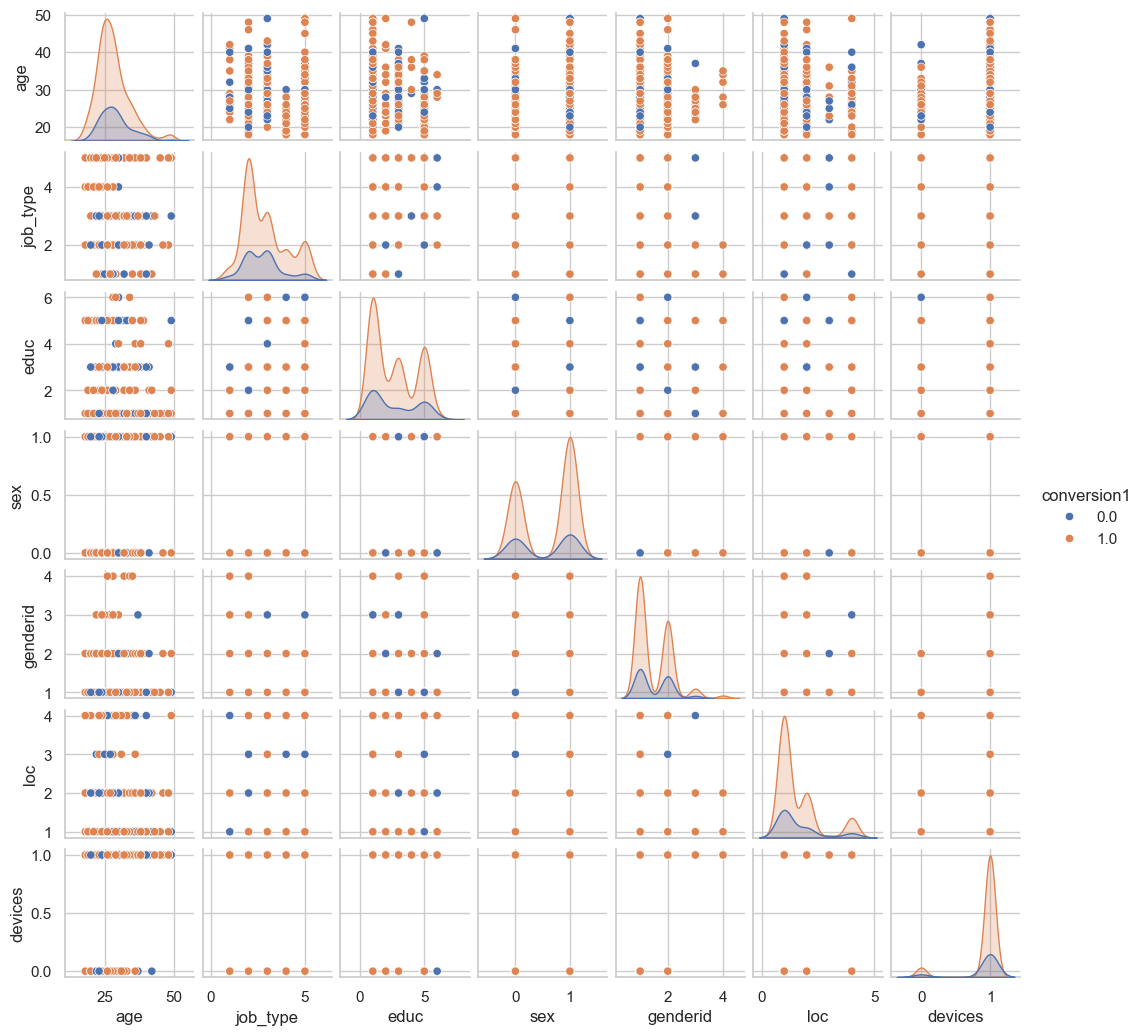

In [9]:
plt.figure(figsize=(10,10))
sns.pairplot(cdata1, hue='conversion1', height=1.5)
plt.show()

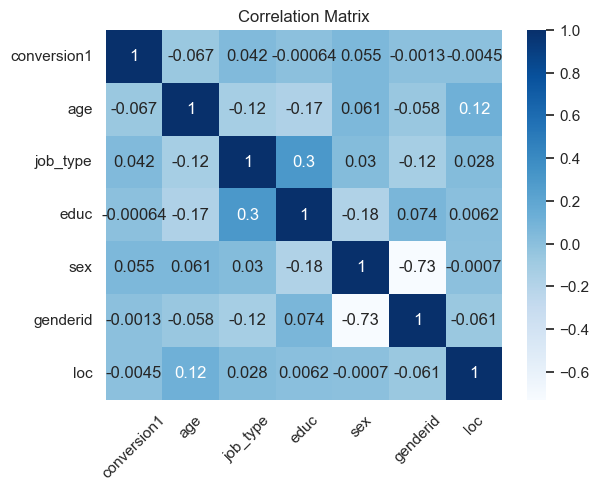

In [10]:
corr_matrix = cdata1.iloc[:,:7].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

##### Investigate missing values and uniqueness

Text(0.5, 1.0, 'Missing values heatmap')

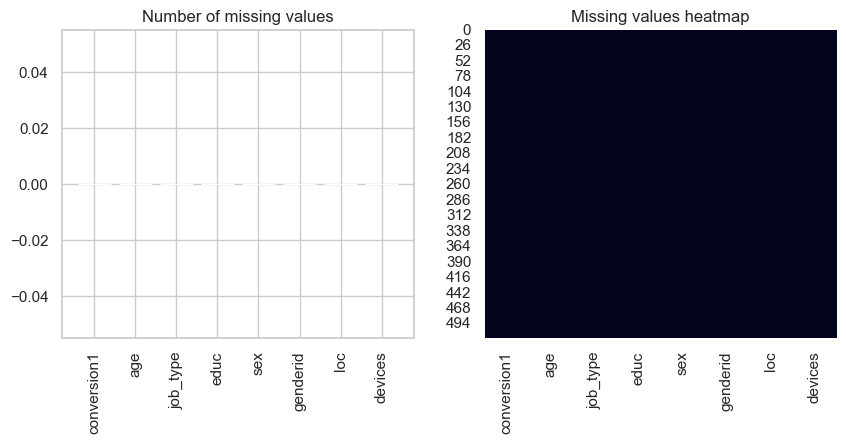

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(cdata1.columns.values, cdata1.isnull().sum())
plt.xticks(rotation=90)
plt.title("Number of missing values")
plt.subplot(122)
sns.heatmap(cdata1.isnull(), cbar = False).set_title("Missing values heatmap")

In [12]:
N_val = cdata1.nunique()
print(N_val)

conversion1     2
age            30
job_type        5
educ            6
sex             2
genderid        4
loc             4
devices         2
dtype: int64


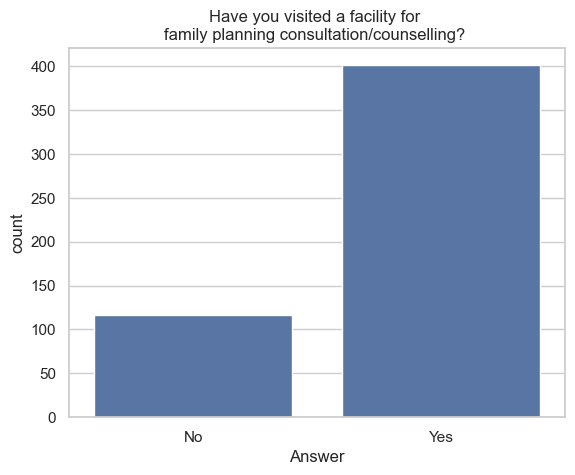

No - 117
Yes - 401


In [13]:
labels = ['No','Yes']
bins =[0,1,99]
temp['conversion1'] = pd.cut(data['conversion1'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion1', data=temp)
plt.title(label='Have you visited a facility for \nfamily planning consultation/counselling? ')
plt.xlabel("Answer")
plt.show()

print("No - " + str (((temp['conversion1'] == 'No')).sum() ))
print("Yes - " + str (((temp['conversion1'] == 'Yes')).sum() ))
cdata1['conversion1'] = temp['conversion1']


##### Age

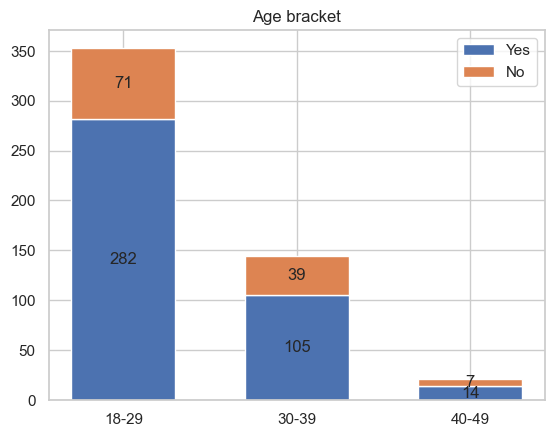

18-29 - 353
30-39 - 144
40-49 - 21


In [14]:
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=new_age_labels, right=False)

a = ((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29) & (data['conversion1'] >= 1) ).sum()
b = ((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29) & (data['conversion1'] < 1) ).sum()
c = ((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39) & (data['conversion1'] >= 1) ).sum()
d = ((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39) & (data['conversion1'] < 1) ).sum()
e = ((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49) & (data['conversion1'] >= 1) ).sum()
f = ((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49) & (data['conversion1'] < 1) ).sum()

label1 = {
    'Yes' : np.array([a,c,e]),
    'No' : np.array([b,d,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(age_labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

print("18-29 - " + str (((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29)).sum() ))
print("30-39 - " + str (((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39)).sum() ))
print("40-49 - " + str (((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49)).sum() ))


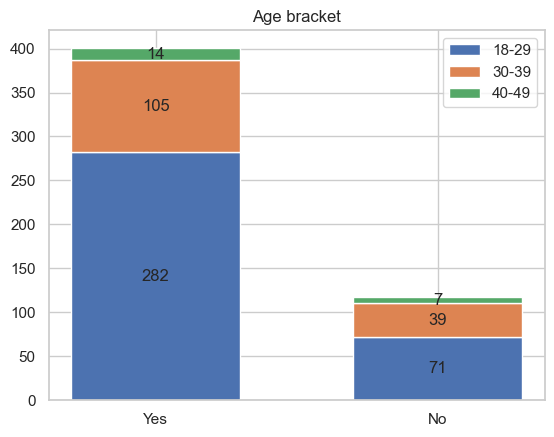

In [15]:
conv_label = ['Yes','No']
label1 = {
    '18-29' : np.array([a,b]),
    '30-39' : np.array([c,d]),
    '40-49' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

In [16]:
contingency_table = pd.crosstab(cdata1['age_bracket'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between the age bracket and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between the age bracket and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
age_bracket         
0            68  260
1            41  122
2             8   19

Chi-Square Statistic: 2.025563131660094
P-Value: 0.3632072881986664
Degrees of Freedom: 2
Expected Frequencies:
 [[ 74.08494208 253.91505792]
 [ 36.81660232 126.18339768]
 [  6.0984556   20.9015444 ]]

H0: There is no significant association between the age bracket and conversion
Fail to reject the null hypothesis: No significant association found.


##### Gender

male (yes)- 156
female (yes)- 245
male (no)- 53
female (no)- 64


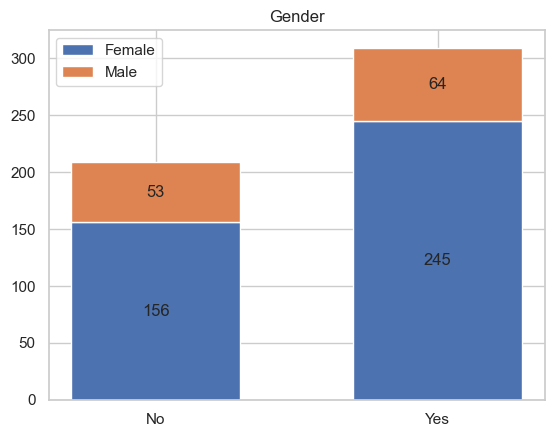

In [17]:
cdata1['female'] = data['female']
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['female'] = pd.cut(cdata1['female'], bins=sex_bins, labels=sex_labels, right=False)


a = ((data['female'] == 0) & (data['conversion1'] >= 1)).sum()  # male yes
b = ((data['female'] == 1) & (data['conversion1'] >= 1)).sum()  # female yes
c = ((data['female'] == 0) & (data['conversion1'] < 1)).sum()   # male no
d = ((data['female'] == 1) & (data['conversion1'] < 1)).sum()   # female no

conv_label = ['No','Yes']
label1 = {
    'Female' : np.array([a,b]),
    'Male' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (yes)- " + str (a))
print("female (yes)- " + str (b))
print("male (no)- " + str (c))
print("female (no)- " + str (d))


male (yes)- 156
female (yes)- 245
male (no)- 53
female (no)- 64


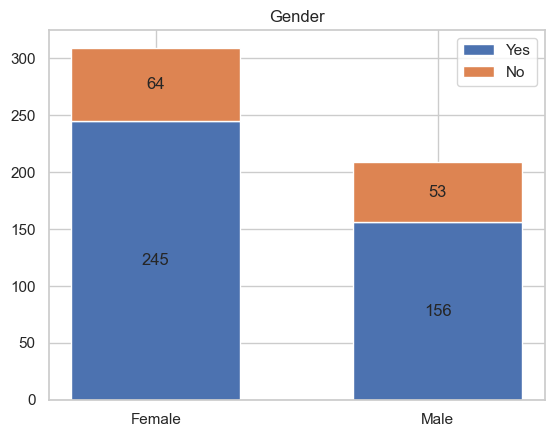

In [18]:
conv_label = ['Female','Male']
label1 = {
    'Yes' : np.array([b,a]),
    'No' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (yes)- " + str (a))
print("female (yes)- " + str (b))
print("male (no)- " + str (c))
print("female (no)- " + str (d))

##### Civil Status

Single yes- 180
Married yes- 206
Separated yes- 8
Widowed yes- 7
Single No- 87
Married No- 28
Separated No- 2
Widowed No- 0


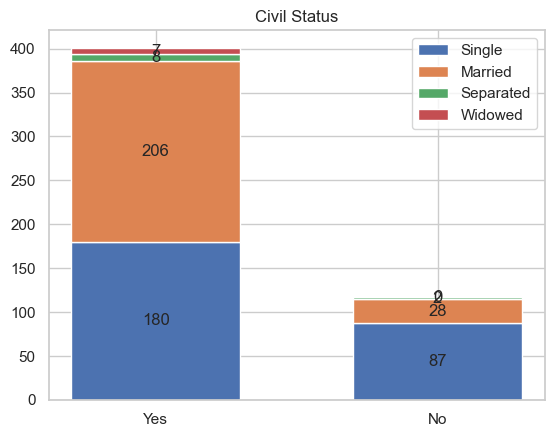

In [19]:
cdata1['civil'] = data['civil']

civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

a = ((data['civil'] == 1)  & (data['conversion1'] >= 1) ).sum() # Single yes
b = ((data['civil'] == 2)  & (data['conversion1'] >= 1) ).sum() # Married yes
c = ((data['civil'] == 3)  & (data['conversion1'] >= 1) ).sum() # Separated yes
d = ((data['civil'] == 4)  & (data['conversion1'] >= 1) ).sum() # Widowed yes
e = ((data['civil'] == 1)  & (data['conversion1'] < 1) ).sum() # Single No
f = ((data['civil'] == 2)  & (data['conversion1'] < 1) ).sum() # Married No
g = ((data['civil'] == 3)  & (data['conversion1'] < 1) ).sum() # Separated No
h = ((data['civil'] == 4)  & (data['conversion1'] < 1) ).sum() # Widowed No



conv_label = ['Yes','No']
label1 = {
    'Single' : np.array([a,e]),
    'Married' : np.array([b,f]),
    'Separated' : np.array([c,g]),
    'Widowed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single yes- " + str (a))
print("Married yes- " + str (b))
print("Separated yes- " + str (c))
print("Widowed yes- " + str (d))
print("Single No- " + str (e))
print("Married No- " + str (f))
print("Separated No- " + str (g))
print("Widowed No- " + str (h))


Single yes- 180
Married yes- 206
Separated yes- 8
Widowed yes- 7
Single No- 87
Married No- 28
Separated No- 2
Widowed No- 0


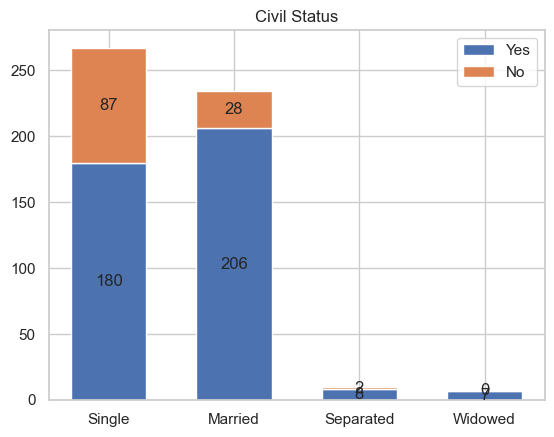

In [20]:
conv_label = ['Single','Married','Separated','Widowed']
label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single yes- " + str (a))
print("Married yes- " + str (b))
print("Separated yes- " + str (c))
print("Widowed yes- " + str (d))
print("Single No- " + str (e))
print("Married No- " + str (f))
print("Separated No- " + str (g))
print("Widowed No- " + str (h))


Single yes- 180
Married yes- 206
Single No- 87
Married No- 28


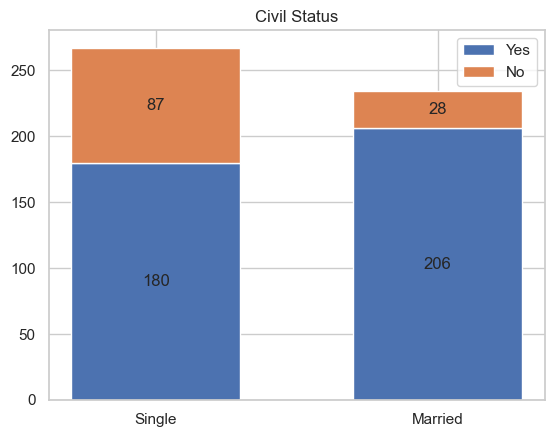

In [21]:
conv_label = ['Single','Married']
label1 = {
    'Yes' : np.array([a,b]),
    'No' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single yes- " + str (a))
print("Married yes- " + str (b))
print("Single No- " + str (e))
print("Married No- " + str (f))


In [22]:
contingency_table = pd.crosstab(cdata1['civil'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between civil status and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between civil status and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion1  No  Yes
civil               
1.0          87  180
2.0          28  206
3.0           2    8
4.0           0    7

Chi-Square Statistic: 32.43943212301286
P-Value: 4.2282526004578736e-07
Degrees of Freedom: 3
Expected Frequencies:
 [[ 60.30694981 206.69305019]
 [ 52.85328185 181.14671815]
 [  2.25868726   7.74131274]
 [  1.58108108   5.41891892]]

H0: There is no significant association between civil status and conversion
Reject the null hypothesis: There is a significant association between civil status and conversion1.


##### Job Type

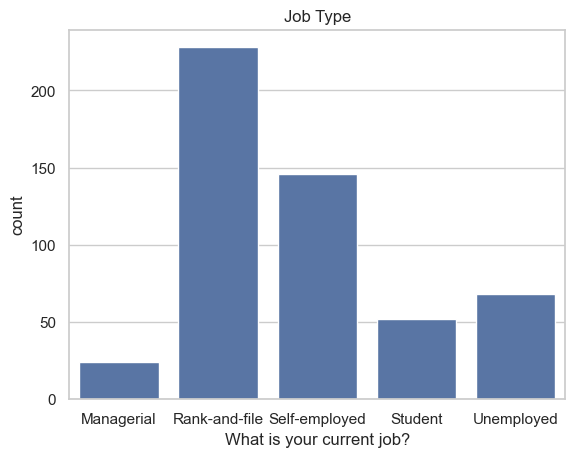

Managerial - 24
Rank-and-file - 228
Self-employed - 146
Student - 52
Unemployed - 68


In [23]:
cdata1['job_type'] = data['job type']

labels = ['Managerial','Rank-and-file','Self-employed',
          'Student','Unemployed']
bins =[1,2,3,4,5,99]
temp['job_type'] = pd.cut(cdata1['job_type'] , bins=bins, labels=labels, right=False)

sns.countplot(x='job_type', data=temp)
plt.title(label='Job Type')
plt.xlabel("What is your current job?")
plt.show()

print("Managerial - " + str (((data['job type'] == 1)).sum() ))
print("Rank-and-file - " + str (((data['job type'] == 2)).sum() ))
print("Self-employed - " + str (((data['job type'] == 3)).sum() ))
print("Student - " + str (((data['job type'] == 4)).sum() ))
print("Unemployed - " + str (((data['job type'] == 5)).sum() ))

##### Educational Attainment

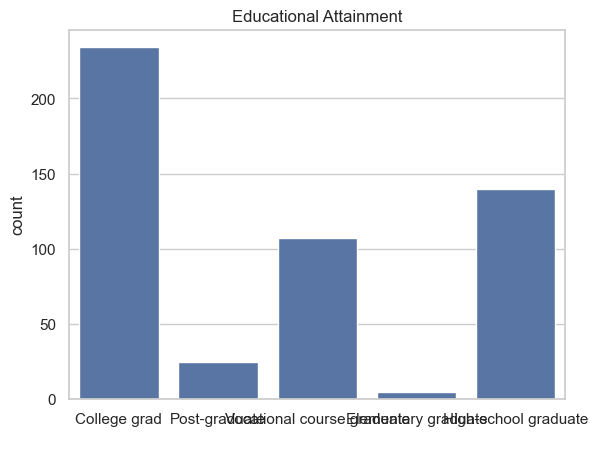

College grad - 234
Post-grad - 25
Voc - 107
Elementary - 5
High School - 140


In [24]:
cdata1['educ'] = data['educ']
labels = ['College grad','Post-graduate','Vocational course graduate','Elementary graduate','High-school graduate']
bins =[1,2,3,4,5,6]
temp['educ'] = pd.cut(cdata1['educ'], bins=bins, labels=labels, right=False)
sns.countplot(x='educ', data=temp)
plt.title(label='Educational Attainment')
plt.xlabel(" ")
plt.show()

print("College grad - " + str (((data['educ'] == 1)).sum() ))
print("Post-grad - " + str (((data['educ'] == 2)).sum() ))
print("Voc - " + str (((data['educ'] == 3)).sum() ))
print("Elementary - " + str (((data['educ'] == 4)).sum() ))
print("High School - " + str (((data['educ'] == 5)).sum() ))


###### Analysis
An ordered educational attainment (elem-hs-voc-col-post grad) gives a slightly lower pseudo R-square value but with less standard error. 

##### Gender Identification

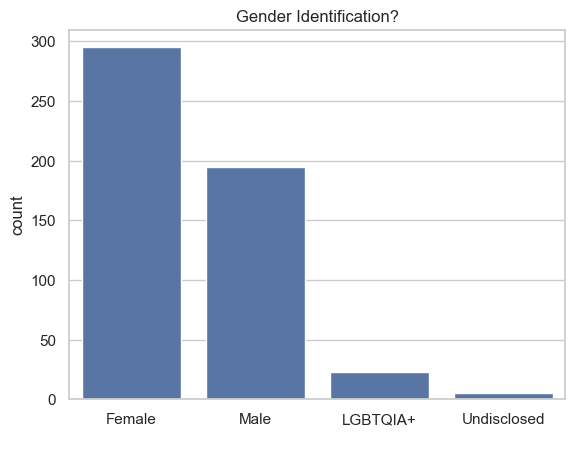

Female - 295
Male - 195
LGBTQIA+ - 23
Undisclosed - 5


In [25]:
cdata1['genderid'] = data['genderid']

labels = ['Female','Male','LGBTQIA+','Undisclosed']
bins =[1,2,3,4,99]
temp['genderid'] = pd.cut(cdata1['genderid'], bins=bins, labels=labels, right=False)

sns.countplot(x='genderid', data=temp)
plt.title(label='Gender Identification?')
plt.xlabel(" ")
plt.show()
print("Female - " + str (((data['genderid'] == 1)).sum() ))
print("Male - " + str (((data['genderid'] == 2)).sum() ))
print("LGBTQIA+ - " + str (((data['genderid'] == 3)).sum() ))
print("Undisclosed - " + str (((data['genderid'] == 4)).sum() ))

##### Location

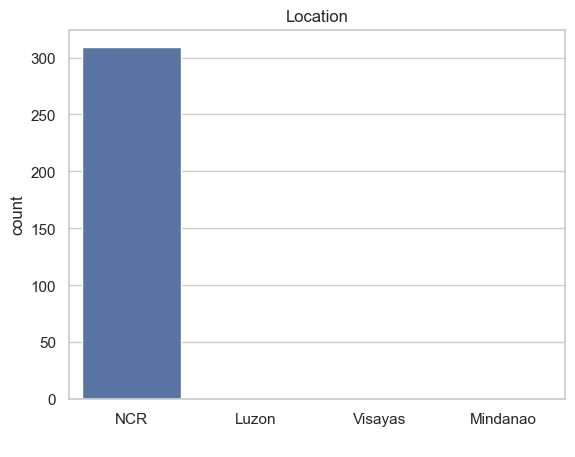

NCR - 336
Luzon - 121
Visayas - 7
Mindanao - 54


In [26]:
cdata1['loc'] = data['loc']
labels = ['NCR','Luzon','Visayas','Mindanao']
bins =[1,2,3,4,99]
temp['loc'] = pd.cut(cdata1['female'], bins=bins, labels=labels, right=False)
sns.countplot(x='loc', data=temp)
plt.title(label='Location')
plt.xlabel(" ")
plt.show()

print("NCR - " + str (((data['loc'] == 1)).sum() ))
print("Luzon - " + str (((data['loc'] == 2)).sum() ))
print("Visayas - " + str (((data['loc'] == 3)).sum() ))
print("Mindanao - " + str (((data['loc'] == 4)).sum() ))

##### Results

In [27]:
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])
#temp['educ_ord'] = label_encoder.fit_transform(cdata1['educ_ord'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])


X = temp[['age_bracket', 'female', 'civil', 'job_type','educ']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.504190
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                 0.05624
Time:                        21:10:24   Log-Likelihood:                -261.17
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 2.884e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.1007      0.175     -0.575      0.565      -0.444      

In [28]:
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])

X = temp[[ 'civil', 'job_type', 'female']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))


Optimization terminated successfully.
         Current function value: 0.504521
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      515
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                 0.05562
Time:                        21:10:24   Log-Likelihood:                -261.34
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 2.067e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
civil          1.2527      0.211      5.932      0.000       0.839       1.

#### Other Features